In [1]:
from MeteorologicalScripts.GetWeatherData import Meteorological
from MeteorologicalScripts.RenewableEnergyModelling import RenewableEnergy
import numpy as np
import pandas as pd
import os

/rds/general/user/cja119/home/anaconda3/envs/JupyterKernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


start_date = np.datetime64('2023-01-01','ns')
end_date = np.datetime64('2024-01-01','ns')
location = 'Coastal Chile'
solar = True
latitudes = (-24,-23)
longitudes = (-68,-67)

weatherdata = Meteorological(date = (start_date,end_date),
                                location= 'Chile', 
                                wind = False,
                                solar = True, 
                                latitudes =latitudes, 
                                longitudes =longitudes,
                                )

points = [(min(latitudes),max(longitudes)),(max(latitudes),max(longitudes)),(max(latitudes),min(longitudes)),(min(latitudes),min(longitudes))]

renewableenergy = RenewableEnergy(weatherdata, points)


QUEUEING TASKS | : 100%|██████████| 366/366 [00:00<00:00, 47519.43it/s]
PROCESSING TASKS | : 100%|██████████| 366/366 [00:00<00:00, 24356.08it/s]
COLLECTING RESULTS | : 100%|██████████| 366/366 [00:00<00:00, 830240.81it/s]
QUEUEING TASKS | : 100%|██████████| 366/366 [00:00<00:00, 49759.01it/s]
PROCESSING TASKS | : 100%|██████████| 366/366 [00:00<00:00, 21841.60it/s]
COLLECTING RESULTS | : 100%|██████████| 366/366 [00:00<00:00, 734153.64it/s]


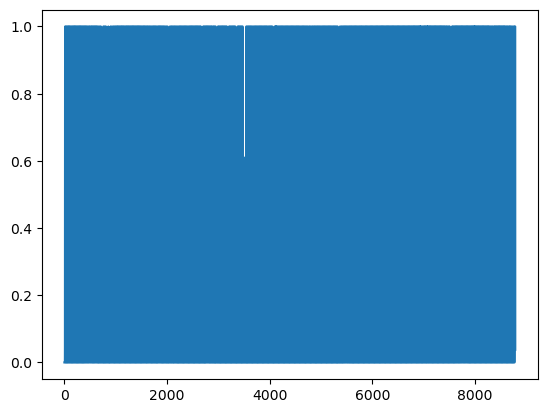

In [3]:
import matplotlib.pyplot as plt
plt.plot(renewableenergy.solar_power_output)

plt.figsize=(8,4)
plt.show()

In [4]:
renewableenergy.solar_capacity_factor

array(0.4427454)

In [4]:
clearness_index = solar_farm.filtered['SWGDN'].mean(dim=['lat', 'lon'],keep_attrs=True) / solar_farm.filtered['SWTDN'].mean(dim=['lat', 'lon'],keep_attrs=True)

In [5]:
diffuse_fraction = 1 / (1 + np.exp(-5.0033 + 8.6025* clearness_index))

In [7]:
values = diffuse_fraction.to_dataframe(name='Diffuse Fraction')

/rds/general/user/cja119/home/anaconda3/envs/JupyterKernel/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/rds/general/user/cja119/home/anaconda3/envs/JupyterKernel/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [8]:
values

,Diffuse Fraction
time,
2023-01-01 00:30:00,NaN
2023-01-01 01:30:00,NaN
2023-01-01 02:30:00,NaN
2023-01-01 03:30:00,NaN
2023-01-01 04:30:00,NaN
...,...
2024-01-01 18:30:00,0.076974
2024-01-01 19:30:00,0.084744
2024-01-01 20:30:00,0.099368
